In [3]:
import yfinance as yf
import pandas as pd
import ta

In [5]:
df = yf.download("^GSPC", start="2018-01-01")
df['200_d_high'] = df.High.rolling(200).max()
df['10_d_low'] = df.Low.rolling(10).min()

[*********************100%***********************]  1 of 1 completed


In [6]:
df['atr'] = ta.volatility.average_true_range(df.High, df.Low, df.Close)
df.tail()

,Open,High,Low,Close,Adj Close,Volume,200_d_high,10_d_low,atr
Date,,,,,,,,,
2023-12-11,4593.390137,4623.709961,4593.390137,4622.439941,4622.439941,3823210000,4623.709961,4537.240234,38.593353
2023-12-12,4618.299805,4643.930176,4608.089844,4643.700195,4643.700195,3808380000,4643.930176,4537.240234,38.396708
2023-12-13,4646.200195,4709.689941,4643.229980,4707.089844,4707.089844,5063650000,4709.689941,4537.240234,40.401226
2023-12-14,4721.040039,4738.569824,4694.339844,4719.549805,4719.549805,6314040000,4738.569824,4546.500000,40.674709
2023-12-15,4714.229980,4725.529785,4704.689941,4719.189941,4719.189941,8218980000,4738.569824,4546.500000,39.257933


In [8]:
df['price'] = df.Open.shift(-1)
df.tail()

,Open,High,Low,Close,Adj Close,Volume,200_d_high,10_d_low,atr,price
Date,,,,,,,,,,
2023-12-11,4593.390137,4623.709961,4593.390137,4622.439941,4622.439941,3823210000,4623.709961,4537.240234,38.593353,4618.299805
2023-12-12,4618.299805,4643.930176,4608.089844,4643.700195,4643.700195,3808380000,4643.930176,4537.240234,38.396708,4646.200195
2023-12-13,4646.200195,4709.689941,4643.229980,4707.089844,4707.089844,5063650000,4709.689941,4537.240234,40.401226,4721.040039
2023-12-14,4721.040039,4738.569824,4694.339844,4719.549805,4719.549805,6314040000,4738.569824,4546.500000,40.674709,4714.229980
2023-12-15,4714.229980,4725.529785,4704.689941,4719.189941,4719.189941,8218980000,4738.569824,4546.500000,39.257933,NaN


In [9]:
df.dropna(inplace=True)

In [10]:
in_position = False
profits = []

for index, row in df.iterrows():
    if not in_position and row.High >= row['200_d_high']:
        in_position = True
        buy_price = row.price
        sl = buy_price - row.atr * 2
        print("Buying now at " + str(buy_price))
    
    if in_position:
        if row.Low <= sl or row.Low <= row['10_d_low']:
            in_position = False
            sell_price = row.price
            print("Selling now at " + str(sell_price))
            profits.append((sell_price - buy_price)/buy_price)

Buying now at 2937.139892578125
Selling now at 2913.030029296875
Buying now at 2952.7099609375
Selling now at 2980.320068359375
Buying now at 3035.389892578125
Selling now at 3103.5
Buying now at 3166.64990234375
Selling now at 3255.35009765625
Buying now at 3335.5400390625
Selling now at 3238.93994140625
Buying now at 3392.510009765625
Selling now at 3371.8798828125
Buying now at 3543.260009765625
Selling now at 3755.75
Buying now at 3878.300048828125
Selling now at 3857.070068359375
Buying now at 3924.52001953125
Selling now at 3917.1201171875
Buying now at 3992.780029296875
Selling now at 4130.5498046875
Buying now at 4242.89990234375
Selling now at 4204.77978515625
Buying now at 4274.4501953125
Selling now at 4265.10986328125
Buying now at 4409.580078125
Selling now at 4382.43994140625
Buying now at 4484.39990234375
Selling now at 4474.81005859375
Buying now at 4546.1201171875
Selling now at 4628.75
Buying now at 4795.490234375
Selling now at 4697.66015625
Buying now at 4271.339843

<AxesSubplot:>

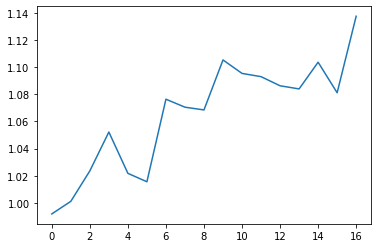

In [11]:
 (pd.Series(profits)+1).cumprod().plot()